### Introduction

This workbook provides the code used to perform the following operations on the raw weather data obtained from the remote weather station at Sugar Bowl Ski Resort:
* Clean and transform the data
* Generate summary statistics
* Plot the monthly precipitation distribution
* Export the cleaned data to CSV

### Import the Data from CSV

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

weather = pd.read_csv("SugarBowl_12-01-05_12_31_16.csv")
weather.head()

,Date,Year,Day_of_Year,Day_of_Run,Solar_Rad,Wind_Speed,Wind_Direction,Wind_Gust,Tavg,Tmax,Tmin,Havg,Hmax,Hmin,Pressure,Snow_Depth,Total_Precip
0,12/1/05,2005,335,1,0.097,2.99,2,19.89,1.9,3,-0.1,98,99,95,796,244.8,99.06
1,12/2/05,2005,336,2,0.841,2.02,295,13.88,-4.7,-0.2,-7.3,90,98,79,799,250.8,3.05
2,12/3/05,2005,337,3,2.794,2.22,126,18.19,-6.5,-3.5,-10,72,94,51,806,453.6,1.52
3,12/4/05,2005,338,4,2.295,0.82,90,13,-5.9,0.6,-10.7,68,88,49,811,253.2,0
4,12/5/05,2005,339,5,2.322,0.46,148,6.47,-3.1,3.7,-7.4,51,78,25,810,253.6,0.25


### Convert Datatypes and Missing Data

When the data was imported into pandas, each entry was read as a string. In order to work with the data, the values must be convereted to numeric data types. Additionally, the weather station provides missing data as the string '--'. In order to handle the missing data in the workflows, I convert the cells containing '--' to NaN's which are a type contained in Numpy.

In [33]:
# Iterate through the columns of the dataframe
for col in weather.columns:
    
    # Skip the 'Date' column becasue it is the only column whose type should remain string
    if (col == "Date"):
        continue
        
    # Iterate through each cell of each column after 'Date' 
    for row in weather.index:
        
        # Replace missing data with NaN
        if weather[col][row] == '--':
            weather.at[row, col] = np.nan
        # Convert all data to float
        else:
            weather.at[row, col] = np.float64(weather[col][row])

### Add a Column to Contain the Month

In continuing with the analysis it will be easier to group data based on the month they were observed in if there is a column which specifies the month. The code below creates a column called 'Month' and fills it with the month as a string. This column is a recode of the 'Date' column using a **regular expression** to assign the month.

In [34]:
# Add a column to store the month as a string
weather['Month'] = weather.Date

# Generate the regular expressions needed to check the month
jan = re.compile(r'^1/')
feb = re.compile(r'^2')
mar = re.compile(r'^3')
apr = re.compile(r'^4')
may = re.compile(r'^5')
jun = re.compile(r'^6')
jul = re.compile(r'^7')
aug = re.compile(r'^8')
sep = re.compile(r'^9')
octo = re.compile(r'^10')
nov = re.compile(r'^11')
dec = re.compile(r'(^12)')

In [35]:
# Iteratively change the values in 'Month' to the month in which the data was taken
for row in weather.index:
    if jan.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "January"
    elif feb.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "February"
    elif mar.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "March"
    elif apr.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "April"
    elif may.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "May"
    elif jun.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "June"
    elif jul.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "July"
    elif aug.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "August"
    elif sep.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "September"
    elif octo.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "October"
    elif nov.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "November"
    elif dec.search(weather["Month"][row]) != None :
        weather.at[row, "Month"] = "December"

### Compute Summary Statistics for the Weather Data

#### Dialy Precipitation Statistics by Month

The first statistics computed are the dialy average precipitation measures for each month. Then, because the mean values are almost useless without having an idea of dispersion, I compute the variance associated with each mean.

These results may be slightly skewed because there is missing data. For example, significant precipitation may have shut the weather station down for a peroid, causing missing data. If this were the case, the averages reported in this section would be biased towards lower precipitaiton days. So we'll take these with a grain of salt...

In [36]:
# Build 12 new dataframes corresponding to the data from each month
All_Jan = weather.loc[weather["Month"] == "January"]
All_Feb = weather.loc[weather["Month"] == "February"]
All_Mar = weather.loc[weather["Month"] == "March"]
All_Apr = weather.loc[weather["Month"] == "April"]
All_May = weather.loc[weather["Month"] == "May"]
All_Jun = weather.loc[weather["Month"] == "June"]
All_Jul = weather.loc[weather["Month"] == "July"]
All_Aug = weather.loc[weather["Month"] == "August"]
All_Sep = weather.loc[weather["Month"] == "September"]
All_Octo = weather.loc[weather["Month"] == "October"]
All_Nov = weather.loc[weather["Month"] == "November"]
All_Dec = weather.loc[weather["Month"] == "December"]

# Build dictionary to hold summary statistics computed on a daily basis from the monthly dataframes

SummaryStats_Daily = {"Month":["January","February", "March", "April", "May", "June",
                 "July", "August", "September", "October", "November", "December"],
                "Mean_Daily_Precip_(mm)":[All_Jan.Total_Precip.mean(),All_Feb.Total_Precip.mean(),
                        All_Mar.Total_Precip.mean(), All_Apr.Total_Precip.mean(),
                        All_May.Total_Precip.mean(), All_Jun.Total_Precip.mean(),
                        All_Jul.Total_Precip.mean(), All_Aug.Total_Precip.mean(),
                        All_Sep.Total_Precip.mean(), All_Octo.Total_Precip.mean(),
                        All_Nov.Total_Precip.mean(), All_Dec.Total_Precip.mean()],
                "Variance_(mm)": [All_Jan.Total_Precip.var(),All_Feb.Total_Precip.var(),
                            All_Mar.Total_Precip.var(), All_Apr.Total_Precip.var(),
                            All_May.Total_Precip.var(), All_Jun.Total_Precip.var(),
                            All_Jul.Total_Precip.var(), All_Aug.Total_Precip.var(),
                            All_Sep.Total_Precip.var(), All_Octo.Total_Precip.var(),
                            All_Nov.Total_Precip.var(), All_Dec.Total_Precip.var()]}

# Build a new dataframe with summary stats dictionary and print

Daily_Precip_Stats = pd.DataFrame(SummaryStats_Daily)
Daily_Precip_Stats

,Mean_Daily_Precip_(mm),Month,Variance_(mm)
0,3.595913,January,128.247768
1,3.872273,February,114.878937
2,4.414470,March,106.551003
3,2.988801,April,65.988057
4,1.626021,May,26.527312
5,0.968272,June,13.776563
6,0.102955,July,1.301173
7,0.125161,August,0.709981
8,0.719267,September,13.604797
9,2.555376,October,135.941865


Interestingly, December has the highest average daily percipitation, but it also has the highest variance. In contrast, March has the second greatest daily precipitation with approximately half the variance displayed by December. The smallest mean precipitation occurs in July and August, which each have small variances.

#### Full Dataset Summary Statistics

After looking at the daily precipitation averages, I wanted to back up and get an idea of the daily averages for each type of measurement. Pandas has a neat function called describe() that quickly generates summary statistics; however, before I could use it, I needed to make sure the column data types were all numeric. Once the column datatypes were all straightened out, I used describe to generate summaries of each monthly data frame.

From the dataframes that describe() returns I then built dataframes for the means and standard deviations of each variable by month for easy comparison. Note that these are also daily averages and are subject to bias based on the missing data.

In [22]:
# Convert the types to numeric from object
weather['Wind_Speed'] = pd.to_numeric(weather['Wind_Speed'])
weather['Wind_Gust'] = pd.to_numeric(weather['Wind_Gust'])
weather['Wind_Direction'] = pd.to_numeric(weather['Wind_Direction'])
weather['Tavg'] = pd.to_numeric(weather['Tavg'])
weather['Tmin'] = pd.to_numeric(weather['Tmin'])
weather['Tmax'] = pd.to_numeric(weather['Tmax'])
weather['Havg'] = pd.to_numeric(weather['Havg'])
weather['Hmax'] = pd.to_numeric(weather['Hmax'])
weather['Hmin'] = pd.to_numeric(weather['Hmin'])
weather['Pressure'] = pd.to_numeric(weather['Pressure'])
weather['Snow_Depth'] = pd.to_numeric(weather['Snow_Depth'])
weather['Total_Precip'] = pd.to_numeric(weather['Total_Precip'])

In [25]:
# Reset the monthly dataframes with numeric datatype columns
All_Jan = weather.loc[weather["Month"] == "January"]
All_Feb = weather.loc[weather["Month"] == "February"]
All_Mar = weather.loc[weather["Month"] == "March"]
All_Apr = weather.loc[weather["Month"] == "April"]
All_May = weather.loc[weather["Month"] == "May"]
All_Jun = weather.loc[weather["Month"] == "June"]
All_Jul = weather.loc[weather["Month"] == "July"]
All_Aug = weather.loc[weather["Month"] == "August"]
All_Sep = weather.loc[weather["Month"] == "September"]
All_Octo = weather.loc[weather["Month"] == "October"]
All_Nov = weather.loc[weather["Month"] == "November"]
All_Dec = weather.loc[weather["Month"] == "December"]

# Generate the summary statistics and store them
All_Jan_stats = All_Jan.describe()
All_Feb_stats = All_Feb.describe()
All_Mar_stats = All_Mar.describe()
All_Apr_stats = All_Apr.describe()
All_May_stats = All_May.describe()
All_Jun_stats = All_Jun.describe()
All_Jul_stats = All_Jul.describe()
All_Aug_stats = All_Aug.describe()
All_Sep_stats = All_Sep.describe()
All_Octo_stats = All_Octo.describe()
All_Nov_stats = All_Nov.describe()
All_Dec_stats = All_Dec.describe()

In [54]:
# Build and display a dataframe with the mean daily values for each month

# List to hold the months
Months = ["January","February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", 
          "December"]

# List to hold the factors
Factors = ["Solar_Rad", "Tavg", "Tmax", "Tmin", "Havg", 
           "Hmax", "Hmin", "Pressure", "Snow_Depth", 
           "Total_Precip"]

#List to hold the summmary statistics dataframes
MonthlySummaries = [All_Jan_stats, All_Feb_stats, All_Mar_stats, All_Apr_stats, 
                    All_May_stats, All_Jun_stats, All_Jul_stats, All_Aug_stats, 
                    All_Sep_stats, All_Octo_stats, All_Nov_stats, All_Dec_stats]

# Initialise Dictionary with no data for the means
meanStats = {"Month": Months,"Solar_Rad":[], "Tavg":[], "Tmax":[], "Tmin":[], 
             "Havg":[], "Hmax":[], "Hmin":[], "Pressure":[], "Snow_Depth":[], 
             "Total_Precip":[]}

# Initialise Dictionary with no data for the standard deviations
stdStats = {"Month": Months,"Solar_Rad":[], "Tavg":[], "Tmax":[], "Tmin":[], 
             "Havg":[], "Hmax":[], "Hmin":[], "Pressure":[], "Snow_Depth":[], 
             "Total_Precip":[]}

# Iteratively fill the dictionary with daily average data
for fact in Factors:
    for df in MonthlySummaries:
        meanStats[fact].append(df[fact]["mean"])
        
# Iteratively fill the dictionary with daily standard deviation data
for fact in Factors:
    for df in MonthlySummaries:
        stdStats[fact].append(df[fact]["std"])

# Build a new dataframe with summary stats dictionary and print
meanStats_df = pd.DataFrame(meanStats)
meanStats_df

,Havg,Hmax,Hmin,Month,Pressure,Snow_Depth,Solar_Rad,Tavg,Tmax,Tmin,Total_Precip
0,65.464396,83.095975,44.696594,January,788.820433,1053.265728,89.591320,-0.814861,4.024458,-4.833746,3.595913
1,67.746212,84.598485,46.602273,February,786.238636,1376.616061,253.641916,-1.015152,3.750379,-5.251515,3.872273
2,68.135385,86.375385,46.646154,March,786.026490,1725.248646,187.984695,0.708923,5.626154,-4.007077,4.414470
3,64.381988,87.990683,39.686335,April,786.089041,1506.391273,184.924197,3.174845,8.881366,-1.918634,2.988801
4,57.057143,83.739683,32.660317,May,787.728873,719.956794,277.080378,7.362222,13.565397,1.368889,1.626021
5,51.225166,77.291391,28.986755,June,788.915441,265.841490,291.828070,12.103974,18.043377,5.589404,0.968272
6,47.125424,73.098305,24.437288,July,791.439394,115.548949,375.035660,15.829831,22.752881,8.523390,0.102955
7,44.258065,70.471774,22.846774,August,790.695853,136.481532,603.856026,14.918548,21.713306,7.823790,0.125161
8,46.255725,69.515267,24.965649,September,790.172414,132.174542,487.192903,12.671374,19.680153,6.308015,0.719267
9,57.378641,79.572816,33.579288,October,789.354839,176.522201,295.323100,7.122330,13.635275,1.717476,2.555376


In [56]:
# Contruct dataframe with variances
stdStats_df = pd.DataFrame(stdStats)
stdStats_df

,Havg,Hmax,Hmin,Month,Pressure,Snow_Depth,Solar_Rad,Tavg,Tmax,Tmin,Total_Precip
0,21.795659,16.028122,27.061367,January,6.158765,764.393295,372.843361,4.089317,5.350398,4.021187,11.324653
1,20.565392,13.868124,27.060504,February,5.876410,818.485099,597.168384,4.180418,5.675496,4.110544,10.718159
2,20.992359,13.364570,28.475694,March,5.436981,950.242687,524.426152,4.734919,6.355344,3.963395,10.322355
3,18.613968,12.011284,23.430903,April,4.495009,1046.741252,519.290852,4.824304,6.748810,4.221790,8.123303
4,18.038791,13.886557,20.412830,May,3.890790,900.811589,616.872824,4.451208,6.558826,3.355780,5.150467
5,16.857886,15.096628,16.782164,June,2.875687,491.735366,629.169178,4.252158,5.363827,3.567380,3.711679
6,11.814375,13.189378,9.503417,July,2.220737,85.306615,692.724153,3.007178,3.220637,3.569642,1.140690
7,11.938012,14.806416,8.876612,August,2.123421,92.345069,799.499456,2.682946,3.127743,3.001153,0.842603
8,16.503554,19.259017,13.667745,September,3.163033,112.825525,756.615607,3.846517,4.804419,3.645705,3.688468
9,19.839510,18.164616,21.286489,October,4.428436,356.205810,634.610066,4.238865,6.257065,3.411167,11.659411


**Humidity:**
* The daily average humidity is higher in the winter months, peaking in March
* The standard deviation associated with these means show that the humidity in winter is much more variable
* This makes sense because in a California winter, storms are interspered with dry periods while little moisture is obsereved in the summer

**Pressure:**
* The average daily pressure fluctuates little in all months 
* Summer months seem to slightly higher average pressures than other months
* Pressure is much more varaible in the winter months

**Temperature:**
* The coldest daily average temperature is in December
* The warmest daily average temperature is in July
* The highest daily temperature variance is in April
* The most consistent temperature month is August


#### Monthly Summary Total Precipitation Statistics 

At this point, were starting to get an idea of the trends in the dataset. The daily summary statistics give a decent idea of the trends in the data, but it is difficult to see clear patterns because the weather is so variable from day-to-day. To get a clearer picture of whats going on month-to-month, we can look at the total monthly averages. We'll just look at the total precipitation because that's what we are primarily concerned with anyways.

In order to get the total monthly statistics we need to deal with the missing data. Since we are totaling the entries in each month, we need to be sure that each month has a complete set of data. In order to perform these computations, I make a dictionary of all the month-year pairs with missing data and make sure **not** to include those months in the calculation.

In [58]:
# Build a dictionary containing the month/year with missing data
MissingMonths = {}

# Build a series containing a bool describing if Total_Precip contains missing data
TP_null = weather['Total_Precip'].isnull()

# Run through the boolean series to locate months with missing data and fill the dictionary
for i in range(len(TP_null)):
    if TP_null[i] == True:    # Check if the column contains nan at this location
        yr, mo = weather.at[i,"Year"], weather.at[i,"Month"] # Store year-month pair
        if yr in MissingMonths and mo in MissingMonths[yr]:
            continue
        elif yr in MissingMonths and mo not in MissingMonths[yr]:
            lis = MissingMonths[yr]
            lis.append(mo)
            MissingMonths[yr] = lis
        else:
            MissingMonths[yr] = [mo] # Add year-month pair if not yet added
MissingMonths

{2005: ['December'],
 2006: ['January'],
 2009: ['August', 'September', 'October'],
 2013: ['July', 'August', 'September'],
 2014: ['January', 'February', 'May'],
 2015: ['March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'December'],
 2016: ['January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December']}


Evidently, much of the data from 2016 and 2015 is missing...


In [59]:
# Compute the mean total precipitation by month excluding months with missing data

# A function that computes the monthly average
# Parameters: month, dataframe, dictionary of year-month pairs with missing data
# Returns: Both the computed average and the number of observations
def MonthlyAverage(month, df, dic):
    Total = 0                # Initialize total sum at zero
    n = 0                    # Initialize the number of months at zero
    lis = []                 # Initialize list to hold monthly totals
    PreviousCompleteYear = 0 # Initialize the variable to detect when we are looking at a new year
    b = True                 # Boolean to tell the function when it is on the first year
    
    for row in df.index:     # Loop through the rows of the data frame
        mo, yr = df.at[row,"Month"], df.at[row,"Year"]  # Get the month and year of the current row
        boolean = yr in dic and mo in dic[yr]           # Check if the current month and year is missing data
        if mo == month and boolean == False:            # If the current month is not missing data, proceed
            if yr != PreviousCompleteYear and b == True:   # Check if we are on the first year
                n = n + 1                                  # If so, add 1 to count and set the bool to false 
                b = False
            elif yr != PreviousCompleteYear:               # If the year changes, add the total
                n = n + 1                                  # to the list, zero the total and
                lis.append(Total)                          # one to the month count
                Total = 0                                  
            Total = Total + df.at[row,"Total_Precip"]  # Increase the total precip
            PreviousCompleteYear = yr                  # Reset the previous year
    
    lis.append(Total)        # Add the last total to the list
    s1 = pd.Series(lis)      # Convert the list to a Series
    mean = s1.mean()         # Compute summary statistics and return
    st = s1.std()
    return mean,st,n

In [60]:
# Create a dataframe with the monthly summaries

SummaryStats_Monthly = {"Month":["January","February", "March", "April", "May", "June",
                                 "July", "August", "September", "October", "November", 
                                 "December"]}
MeanList = []
StdList = []
NList = []
for mo in SummaryStats_Monthly["Month"]:
    mean, std, n = MonthlyAverage(mo, weather, MissingMonths)
    MeanList.append(mean)
    StdList.append(std)
    NList.append(n)

SummaryStats_Monthly["Average"] = MeanList
SummaryStats_Monthly["Standard_Dev"] = StdList
SummaryStats_Monthly["N"] = NList

Monthly_Precip_Stats = pd.DataFrame(SummaryStats_Monthly)
Monthly_Precip_Stats



,Average,Month,N,Standard_Dev
0,79.400000,January,8,57.592835
1,107.942222,February,9,68.393325
2,136.586667,March,9,90.042939
3,87.374444,April,9,85.306250
4,53.851250,May,8,36.975019
5,29.263333,June,9,27.990197
6,3.397500,July,8,6.415957
7,3.880000,August,7,6.984008
8,16.508571,September,7,21.216886
9,85.626250,October,8,82.360352


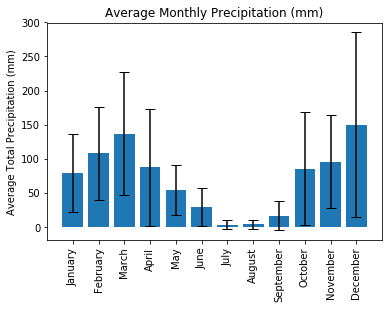

In [110]:
# Make a bar chart of the monthly averages

plt.bar(Monthly_Precip_Stats.Month,
        Monthly_Precip_Stats.Average,
        yerr = Monthly_Precip_Stats.Standard_Dev,
        capsize = 5,
        ecolor = "Black",
        )
plt.ylabel("Average Total Precipitation (mm)")
plt.xticks(rotation = 'vertical')
plt.title("Average Monthly Precipitation (mm)")
plt.show()

Notice that the total monthly average precipitation mirrors the trends we observed in the daily avearges. December still has the highest average snowfall with march a close second. Additionally, December still has by far the largest variance. 